<a href="https://colab.research.google.com/github/sohdacafe/Machine_Learning/blob/main/Pycaret_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

     |████████████████████████████████| 288 kB 16.3 MB/s 
     |████████████████████████████████| 261 kB 62.7 MB/s 
     |████████████████████████████████| 2.0 MB 48.4 MB/s 
     |████████████████████████████████| 16.9 MB 195 kB/s 
     |████████████████████████████████| 167 kB 57.5 MB/s 
     |████████████████████████████████| 113 kB 62.3 MB/s 
     |████████████████████████████████| 1.7 MB 40.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 5.1 MB/s 
     |████████████████████████████████| 6.8 MB 65.9 MB/s 
     |████████████████████████████████| 1.3 MB 67.6 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 
     |████████████████████████████████| 675 kB 61.7 MB/s 
     |████████████████████████████████| 102 kB 12.0 MB/s 
     |████████████████████████████████| 3.1 MB 45.4 MB/s 
     |█████████████████

In [13]:
import pandas as pd
import numpy as np
from pycaret.regression import *
from pycaret.classification import *
# 回帰ならregression、分類ならclassificationを用いる

In [14]:
filename = 'train.csv'
_df = pd.read_csv(filename)
df = _df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
exp = setup(df, target='Survived')

,Description,Value
0,session_id,8056
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 8)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [16]:
# モデルの予測精度の比較、R2の高い順に並べて出力
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8282,0.8718,0.7319,0.7948,0.7600,0.6270,0.6300,0.078
lr,Logistic Regression,0.8202,0.8636,0.7312,0.7775,0.7498,0.6103,0.6140,0.383
ridge,Ridge Classifier,0.8169,0.0000,0.7139,0.7799,0.7428,0.6016,0.6049,0.014
gbc,Gradient Boosting Classifier,0.8169,0.8802,0.6719,0.8138,0.7320,0.5957,0.6050,0.104
lda,Linear Discriminant Analysis,0.8169,0.8616,0.7139,0.7803,0.7431,0.6017,0.6050,0.018
rf,Random Forest Classifier,0.8105,0.8703,0.7449,0.7505,0.7449,0.5947,0.5977,0.511
dt,Decision Tree Classifier,0.7931,0.7819,0.7409,0.7224,0.7298,0.5626,0.5645,0.017
et,Extra Trees Classifier,0.7881,0.8420,0.7072,0.7280,0.7124,0.5457,0.5504,0.462
ada,Ada Boost Classifier,0.7865,0.8521,0.7145,0.7146,0.7125,0.5430,0.5449,0.108
knn,K Neighbors Classifier,0.7208,0.7438,0.5538,0.6519,0.5953,0.3857,0.3908,0.119


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8056, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [17]:
# 指定したモデルの公差検証を自動で実行
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7619,0.7799,0.6250,0.7143,0.6667,0.4828,0.4854
1,0.8730,0.8868,0.7917,0.8636,0.8261,0.7264,0.7281
2,0.8730,0.9306,0.8333,0.8333,0.8333,0.7308,0.7308
3,0.8548,0.9242,0.8261,0.7917,0.8085,0.6917,0.6921
4,0.8548,0.9019,0.8261,0.7917,0.8085,0.6917,0.6921
5,0.8710,0.9025,0.8261,0.8261,0.8261,0.7235,0.7235
6,0.7903,0.8584,0.6087,0.7778,0.6829,0.5298,0.5386
7,0.7581,0.8183,0.5652,0.7222,0.6341,0.4574,0.4651
8,0.8710,0.8914,0.7500,0.9000,0.8182,0.7195,0.7266
9,0.7742,0.8246,0.6667,0.7273,0.6957,0.5167,0.5179


In [18]:
# 一番良かったモデルの出力
print(model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8056, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [19]:
# ハイパーパラメータのチューニング
tuned_model = tune_model(model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7143,0.7714,0.5417,0.6500,0.5909,0.3742,0.3778
1,0.8413,0.8868,0.7500,0.8182,0.7826,0.6580,0.6595
2,0.8413,0.9364,0.7083,0.8500,0.7727,0.6523,0.6587
3,0.8226,0.8606,0.7391,0.7727,0.7556,0.6164,0.6168
4,0.8548,0.8829,0.7826,0.8182,0.8000,0.6862,0.6866
5,0.8226,0.9169,0.8261,0.7308,0.7755,0.6298,0.6330
6,0.7742,0.7982,0.6087,0.7368,0.6667,0.4983,0.5035
7,0.7419,0.7492,0.5217,0.7059,0.6000,0.4158,0.4261
8,0.8548,0.9106,0.7917,0.8261,0.8085,0.6917,0.6921
9,0.8226,0.8602,0.7500,0.7826,0.7660,0.6232,0.6236


In [20]:
# 学習済みモデルの予測(テストデータに分割したものの予測)
predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7948,0.8186,0.7383,0.7453,0.7418,0.5715,0.5715


,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,Embarked_not_available,Survived,Label,Score
0,50.000000,28.712500,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0.9047
1,32.000000,7.854200,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0.9432
2,70.000000,71.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.5705
3,41.000000,20.212500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.6020
4,24.000000,83.158302,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.9323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,45.000000,83.474998,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.5432
264,21.000000,8.050000,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9139
265,11.000000,31.275000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.5997
266,45.000000,35.500000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.6589


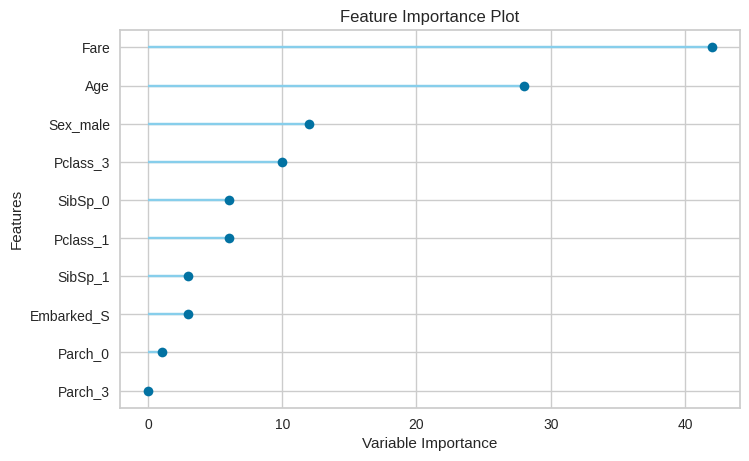

In [23]:
# 結果のプロット
plot_model(tuned_model)
plot_model(tuned_model, plot='feature')

In [26]:
_df_test = pd.read_csv('train.csv')
df_test = _df_test[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
df_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
